# Load and preprocess time series data files

In [3]:
path = './CORESTICKM159SFRBATL.csv'

## Load data from CSV

In [4]:
import pandas as pd
df = pd.read_csv(path)
df

,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245
...,...,...
682,2024-11-01,3.876177
683,2024-12-01,3.746553
684,2025-01-01,3.625276
685,2025-02-01,3.516515


In [5]:
df.observation_date

0      1968-01-01
1      1968-02-01
2      1968-03-01
3      1968-04-01
4      1968-05-01
          ...    
682    2024-11-01
683    2024-12-01
684    2025-01-01
685    2025-02-01
686    2025-03-01
Name: observation_date, Length: 687, dtype: object

In [6]:
df.observation_date.dt.to_period('Q') #note: explicitly showing why this does NOT work, see solution below

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df.observation_date = pd.to_datetime(df.observation_date)
#Setting a unique datetime as the index facilitates time series analysis, making it easier to select, resample, or align data chronologically.
# Many of pandas’ powerful time series functions (like extracting quarters or using `.dt` accessor methods) only work 
# if the column is of datetime dtype. If left as an object, these methods cannot be used.
df.observation_date

0     1968-01-01
1     1968-02-01
2     1968-03-01
3     1968-04-01
4     1968-05-01
         ...    
682   2024-11-01
683   2024-12-01
684   2025-01-01
685   2025-02-01
686   2025-03-01
Name: observation_date, Length: 687, dtype: datetime64[ns]

In [ ]:
df.observation_date.dt.to_period('Q')

0      1968Q1
1      1968Q1
2      1968Q1
3      1968Q2
4      1968Q2
        ...  
682    2024Q4
683    2024Q4
684    2025Q1
685    2025Q1
686    2025Q1
Name: observation_date, Length: 687, dtype: period[Q-DEC]

In [ ]:
df = pd.read_csv(path, parse_dates=['observation_date'])
# Setting `parse_dates` ensures that columns like 'observation date' are imported as datetime dtype, saving a post-processing step.
# It automatically parses specified columns as datetime during import, allowing immediate use of time-based operations.
df

,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245
...,...,...
682,2024-11-01,3.876177
683,2024-12-01,3.746553
684,2025-01-01,3.625276
685,2025-02-01,3.516515


In [ ]:
df.observation_date

0     1968-01-01
1     1968-02-01
2     1968-03-01
3     1968-04-01
4     1968-05-01
         ...    
682   2024-11-01
683   2024-12-01
684   2025-01-01
685   2025-02-01
686   2025-03-01
Name: observation_date, Length: 687, dtype: datetime64[ns]

### Having no datetime column

In [ ]:
path = './demand_cal_historical_datetime-split.csv'

In [ ]:
df = pd.read_csv(path)
df

,year,month,day,hour,value
0,2019,1,1,0,28487
1,2019,1,1,1,30507
2,2019,1,1,2,33785
3,2019,1,1,3,33796
4,2019,1,1,4,32764
...,...,...,...,...,...
55087,2025,4,14,7,27851
55088,2025,4,14,8,26228
55089,2025,4,14,9,25482
55090,2025,4,14,10,24600


In [ ]:
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
# The datetime conversion function expects columns in a specific order (year, month, day, hour), 
# so incorrect ordering can lead to wrong or invalid datetime values.
df

,year,month,day,hour,value,datetime
0,2019,1,1,0,28487,2019-01-01 00:00:00
1,2019,1,1,1,30507,2019-01-01 01:00:00
2,2019,1,1,2,33785,2019-01-01 02:00:00
3,2019,1,1,3,33796,2019-01-01 03:00:00
4,2019,1,1,4,32764,2019-01-01 04:00:00
...,...,...,...,...,...,...
55087,2025,4,14,7,27851,2025-04-14 07:00:00
55088,2025,4,14,8,26228,2025-04-14 08:00:00
55089,2025,4,14,9,25482,2025-04-14 09:00:00
55090,2025,4,14,10,24600,2025-04-14 10:00:00


## Temporal column to index

In [ ]:
df.datetime.dt.to_period('Q')

0        2019Q1
1        2019Q1
2        2019Q1
3        2019Q1
4        2019Q1
          ...  
55087    2025Q2
55088    2025Q2
55089    2025Q2
55090    2025Q2
55091    2025Q2
Name: datetime, Length: 55092, dtype: period[Q-DEC]

In [ ]:
df_idx = df.set_index('datetime')
# Why is it considered best practice to set a uniquely identifying datetime column as the index in a Pandas DataFrame?
# It enables direct access to datetime-specific properties and methods without using the .dt accessor.
# When the datetime column is set as the index, Pandas exposes datetime properties and methods directly on the index, 
# simplifying operations such as resampling, period conversions, and slicing.

df_idx

,year,month,day,hour,value
datetime,,,,,
2019-01-01 00:00:00,2019,1,1,0,28487
2019-01-01 01:00:00,2019,1,1,1,30507
2019-01-01 02:00:00,2019,1,1,2,33785
2019-01-01 03:00:00,2019,1,1,3,33796
2019-01-01 04:00:00,2019,1,1,4,32764
...,...,...,...,...,...
2025-04-14 07:00:00,2025,4,14,7,27851
2025-04-14 08:00:00,2025,4,14,8,26228
2025-04-14 09:00:00,2025,4,14,9,25482


In [ ]:
df_idx.index.to_period('Q')

PeriodIndex(['2019Q1', '2019Q1', '2019Q1', '2019Q1', '2019Q1', '2019Q1',
             '2019Q1', '2019Q1', '2019Q1', '2019Q1',
             ...
             '2025Q2', '2025Q2', '2025Q2', '2025Q2', '2025Q2', '2025Q2',
             '2025Q2', '2025Q2', '2025Q2', '2025Q2'],
            dtype='period[Q-DEC]', name='datetime', length=55092)

/var/folders/01/mbqtydkj16z7_hxjc9fjwh2m0000gp/T/ipykernel_34891/1923741840.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_idx.resample('Q').sum().plot.line()


<Axes: xlabel='datetime'>

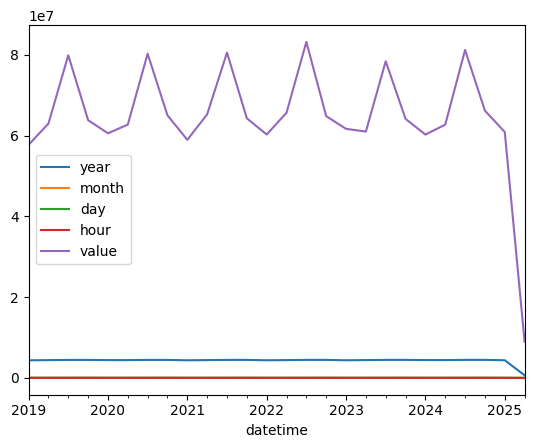

In [ ]:
df_idx.resample('Q').sum().plot.line()
# Resampling and aggregation by periods (such as quarters) are straightforward 
# when the datetime column is set as the index, allowing for concise one-liner analyses.

/var/folders/01/mbqtydkj16z7_hxjc9fjwh2m0000gp/T/ipykernel_34891/807899416.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  df_idx.loc[:'2024'].resample('Q').sum().plot.line()


<Axes: xlabel='datetime'>

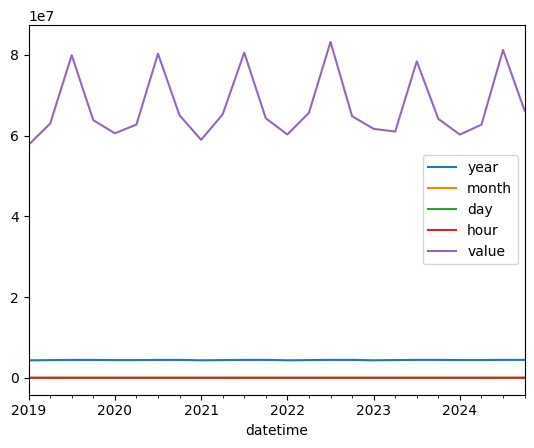

In [ ]:
df_idx.loc[:'2024'].resample('Q').sum().plot.line()

## Load data from Excel

In [ ]:
path = './CORESTICKM159SFRBATL.xlsx'

In [ ]:
pd.read_excel(path)

,FRED Graph Observations,Unnamed: 1,Unnamed: 2
0,"Federal Reserve Economic Data, Federal Reserve...",NaN,NaN
1,Link: https://fred.stlouisfed.org,NaN,NaN
2,Help: https://fredhelp.stlouisfed.org,NaN,NaN
3,This data may be copyrighted. Please refer to ...,NaN,NaN
4,File Created: 2025-04-14 6:07 am CDT,NaN,NaN
5,NaN,NaN,NaN
6,CORESTICKM159SFRBATL,Sticky Price Consumer Price Index less Food an...,Data Updated: 2025-04-10


In [ ]:
pd.read_excel(path, sheet_name=1) 
# as needed: Manually select the appropriate sheet before importing, as Excel files may have multiple sheets.

,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245
...,...,...
682,2024-11-01,3.876177
683,2024-12-01,3.746553
684,2025-01-01,3.625276
685,2025-02-01,3.516515


In [ ]:
df = pd.read_excel(path, sheet_name=1)
df

,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245
...,...,...
682,2024-11-01,3.876177
683,2024-12-01,3.746553
684,2025-01-01,3.625276
685,2025-02-01,3.516515


In [ ]:
df.observation_date

0     1968-01-01
1     1968-02-01
2     1968-03-01
3     1968-04-01
4     1968-05-01
         ...    
682   2024-11-01
683   2024-12-01
684   2025-01-01
685   2025-02-01
686   2025-03-01
Name: observation_date, Length: 687, dtype: datetime64[ns]

In [ ]:
df = pd.read_excel(path, sheet_name=1, parse_dates=True, index_col=0)
df

,CORESTICKM159SFRBATL
observation_date,
1968-01-01,3.651861
1968-02-01,3.673819
1968-03-01,4.142164
1968-04-01,4.155828
1968-05-01,4.088245
...,...
2024-11-01,3.876177
2024-12-01,3.746553
2025-01-01,3.625276
